<a href="https://colab.research.google.com/github/s0jeong/C/blob/master/PHW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [19]:
# Read the CSV dataset file
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/bmi_data_phw1.xlsx')

In [20]:
# Print dataset statistical data, feature names & data types
print("=== BMI Dataset ===")
print(df)
print()

print("=== BMI Dataset Shape ===")
print(df.shape)
print()

print("=== BMI Dataset Statistical ===")
print(df.describe())
print()

print("=== BMI Dataset Feature Names & Data Types ===")
print(df.dtypes)
print()

=== BMI Dataset ===
       Sex  Age  Height (Inches)  Weight (Pounds)  BMI
0   Female   30          63.7902         116.7431    3
1   Female   32          66.7917         125.1554    3
2   Female   27          71.1411         137.1114    3
3     Male   24          66.6432          86.9820    0
4   Female   19          69.4712         138.7444    3
..     ...  ...              ...              ...  ...
95  Female   23          66.7140         130.0975    3
96  Female   30          67.6748         119.5261    2
97    Male   29          65.9390          84.3598    0
98  Female   34          68.6276         124.4062    3
99  Female   22          64.5158         148.5007    4

[100 rows x 5 columns]

=== BMI Dataset Shape ===
(100, 5)

=== BMI Dataset Statistical ===
              Age  Height (Inches)  Weight (Pounds)         BMI
count  100.000000       100.000000       100.000000  100.000000
mean    27.710000        67.753037       124.101520    2.420000
std      5.347132         2.061955 

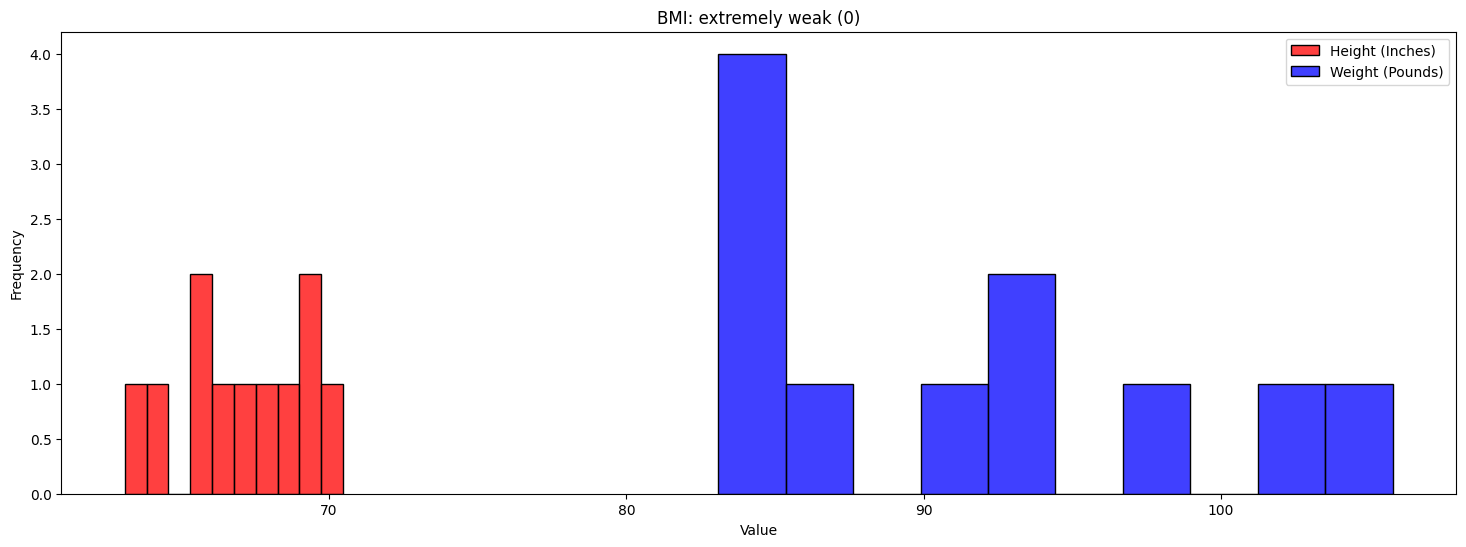

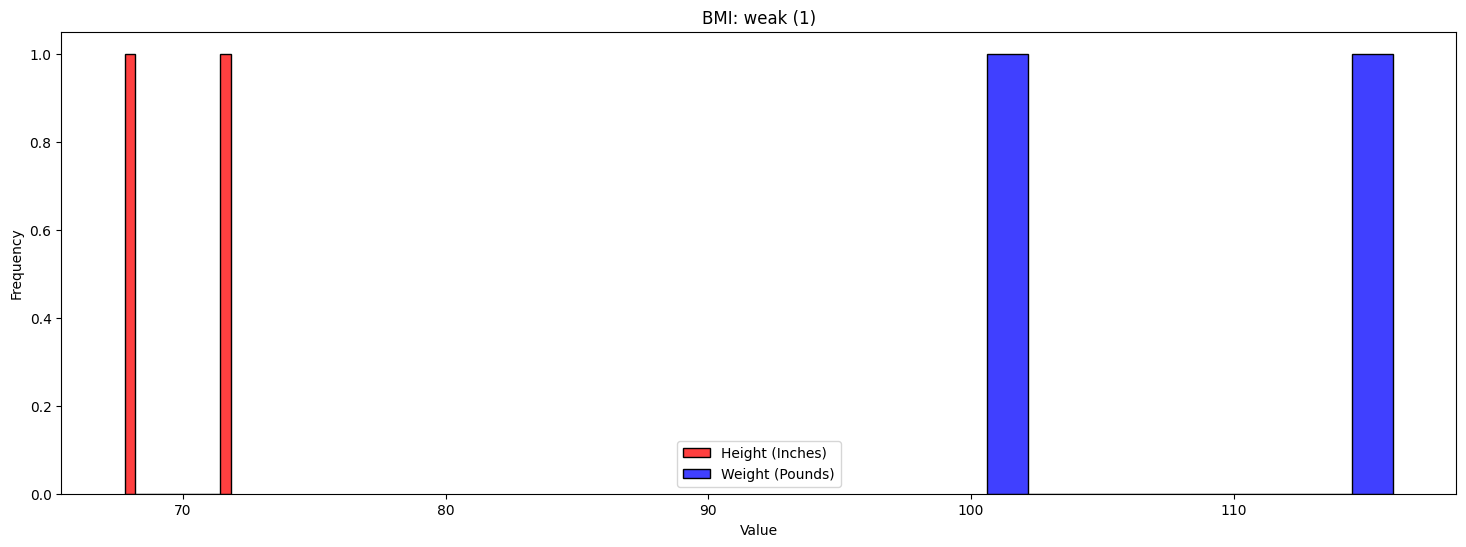

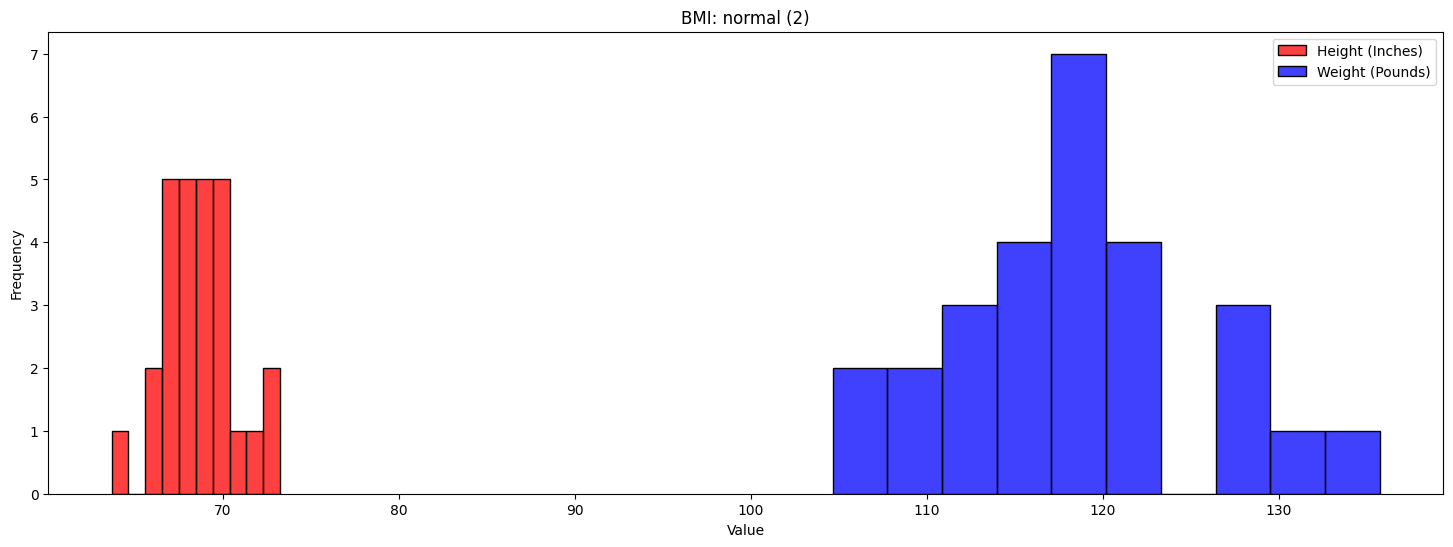

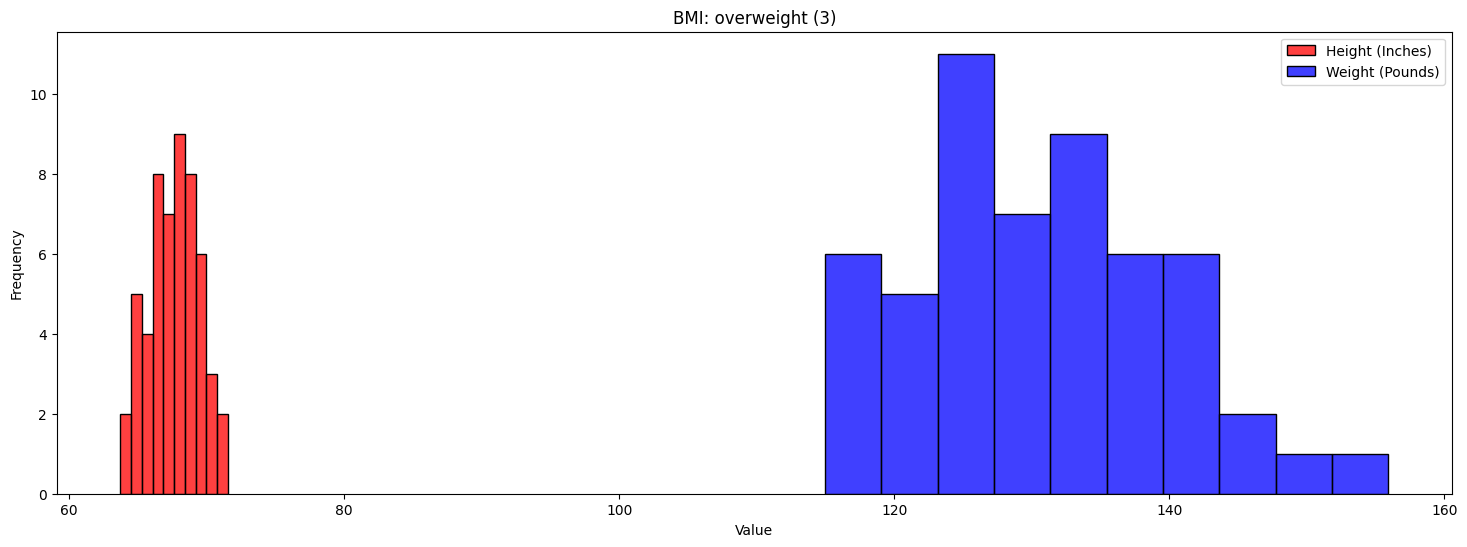

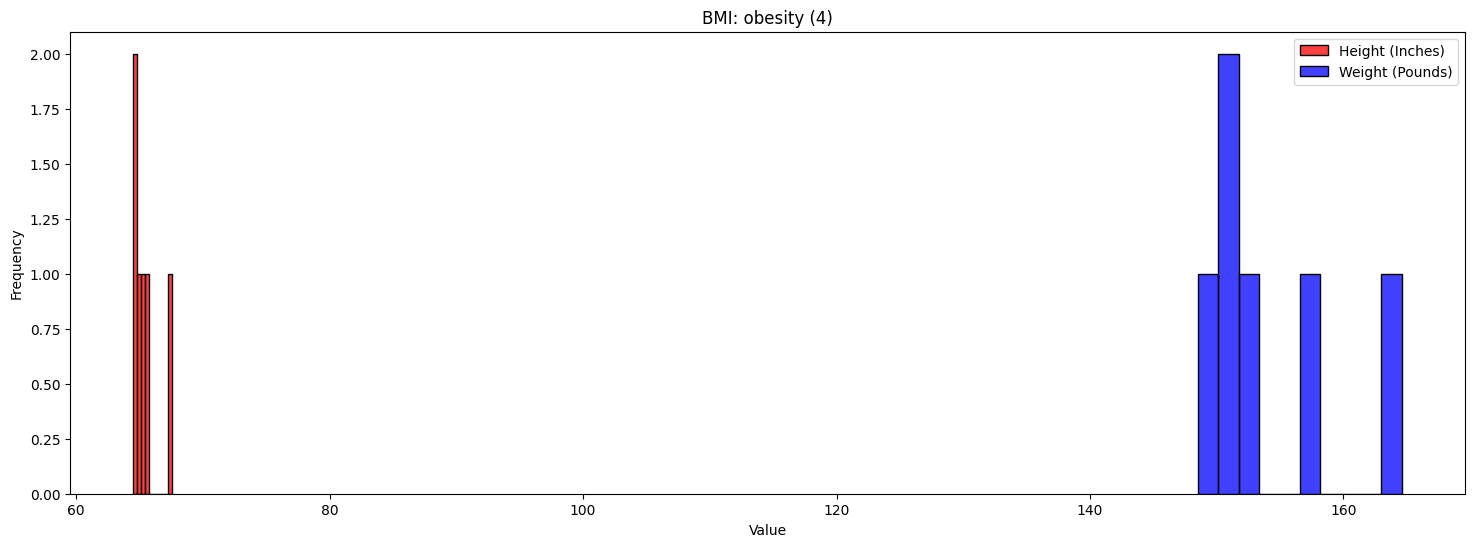

In [21]:
# Plot height & weight histograms (bins=10) for each BMI value
bmi_labels = ['extremely weak (0)', 'weak (1)', 'normal (2)', 'overweight (3)', 'obesity (4)']
for bmi_histogram in range(5):
    plt.figure(figsize=(18, 6))
    sns.histplot(data=df[df['BMI'] == bmi_histogram], x='Height (Inches)', bins=10, color='red', label='Height (Inches)')
    sns.histplot(data=df[df['BMI'] == bmi_histogram], x='Weight (Pounds)', bins=10, color='blue', label='Weight (Pounds)')
    plt.title(f'BMI: {bmi_labels[bmi_histogram]}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

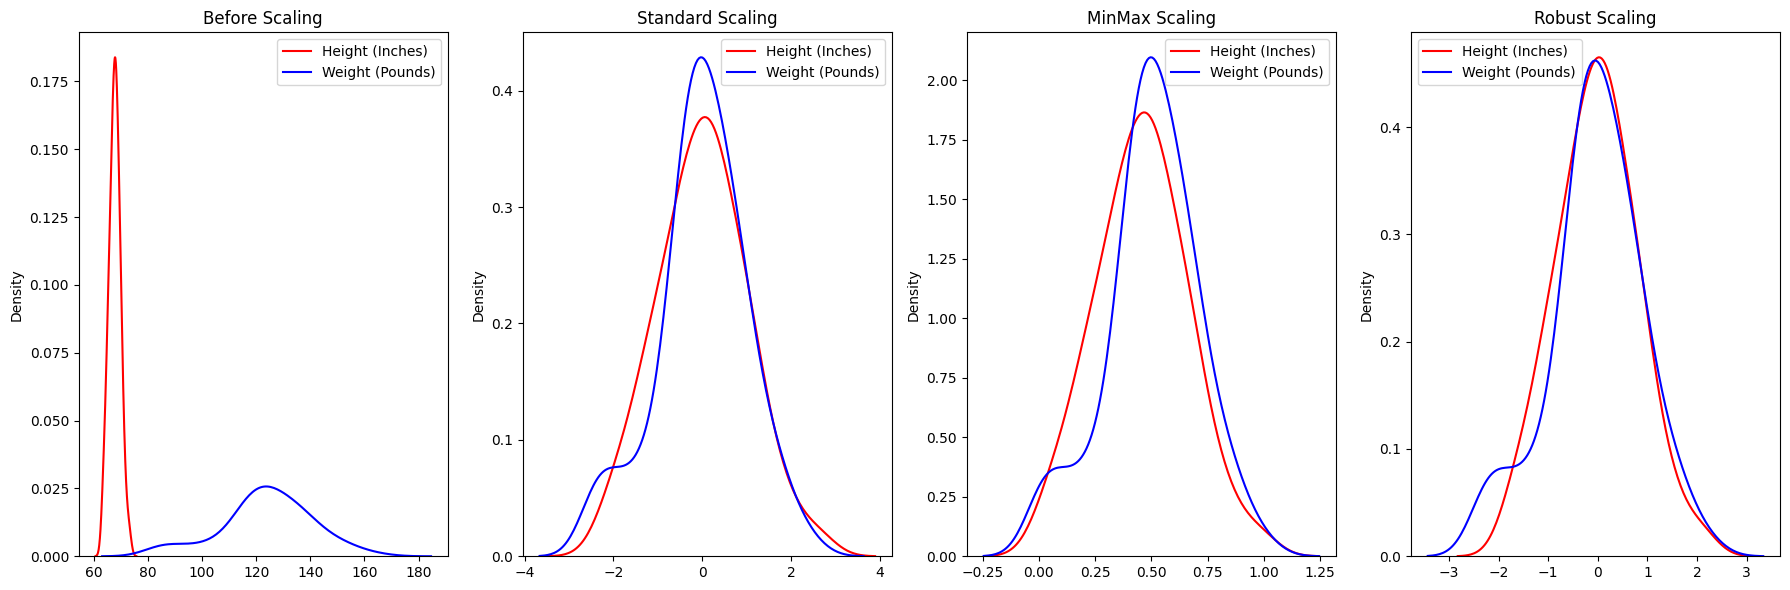

In [22]:
# Plot scaling results for height and weight
height = df['Height (Inches)'].to_numpy()
weight = df['Weight (Pounds)'].to_numpy()

# StandardScaler
height_standard = StandardScaler().fit_transform(height[:, np.newaxis]).reshape(-1)
weight_standard = StandardScaler().fit_transform(weight[:, np.newaxis]).reshape(-1)

# MinMaxScaler
height_minmax = MinMaxScaler().fit_transform(height[:, np.newaxis]).reshape(-1)
weight_minmax = MinMaxScaler().fit_transform(weight[:, np.newaxis]).reshape(-1)

# RobustScaler
height_robust = RobustScaler().fit_transform(height[:, np.newaxis]).reshape(-1)
weight_robust = RobustScaler().fit_transform(weight[:, np.newaxis]).reshape(-1)

# Plot the scaling
fig, axes = plt.subplots(ncols=4, figsize=(18, 6))

scalers = [('Before Scaling', height, weight),
           ('Standard Scaling', height_standard, weight_standard),
           ('MinMax Scaling', height_minmax, weight_minmax),
           ('Robust Scaling', height_robust, weight_robust)]

for i, (title, height_scaled, weight_scaled) in enumerate(scalers):
    ax = axes[i]
    ax.set_title(title)
    sns.kdeplot(height_scaled, ax=ax, color='red', label='Height (Inches)')
    sns.kdeplot(weight_scaled, ax=ax, color='blue', label='Weight (Pounds)')
    ax.legend()

plt.tight_layout()
plt.show()

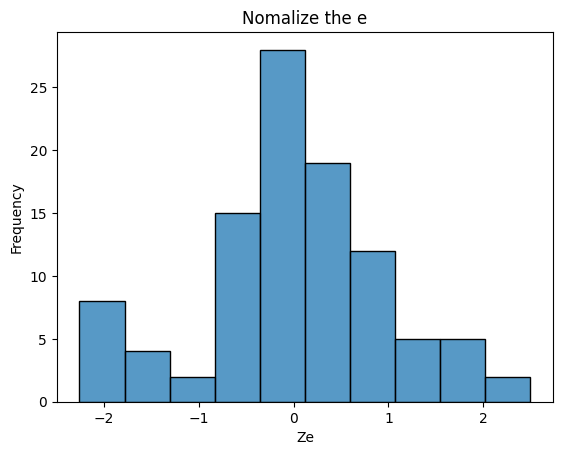

In [23]:
# Fitting the linear regression model
reg = LinearRegression()
reg.fit(df[['Height (Inches)']], df['Weight (Pounds)'])
predict_weight = reg.predict(df[['Height (Inches)']])

# Calculate the residuals
error = df['Weight (Pounds)'] - predict_weight

# Normalizing the residuals
mean = np.mean(error)
std = np.std(error)
normalize = (error - mean) / std

# Visualizing the distribution of normalized residuals
sns.histplot(normalize, bins=10)
plt.xlabel("Ze")
plt.ylabel("Frequency")
plt.title("Nomalize the e")
plt.show()

In [24]:
# Setting the threshold value and estimating BMI
alpha = 1.5
df['Estimated BMI'] = np.where(normalize < -alpha, 0, np.where(normalize > alpha, 4, np.nan))

# Actual BMI is 0 or 4 for female
actual_zero = df.index[(df['BMI'] == 0)].tolist()
actual_four = df.index[(df['BMI'] == 4)].tolist()

# Estimated BMI is 0 or 4 for female
estimate_zero = df.index[(df['Estimated BMI'] == 0)].tolist()
estimate_four = df.index[(df['Estimated BMI'] == 4)].tolist()

print("Actual BMI index 0")
print(actual_zero)
print()

print("Estimated BMI index 0")
print(estimate_zero)
print()

print("Actual BMI index 4")
print(actual_four)
print()

print("Estimated BMI index 4")
print(estimate_four)
print()

Actual BMI index 0
[3, 5, 11, 21, 26, 36, 52, 69, 80, 90, 97]

Estimated BMI index 0
[3, 5, 21, 26, 36, 52, 69, 80, 90, 97]

Actual BMI index 4
[35, 58, 67, 76, 94, 99]

Estimated BMI index 4
[12, 35, 58, 67, 76, 94, 99]



In [25]:
# Female dataset
df_female = df[df['Sex'] == 'Female']

# Print dataset statistical data, feature names & data types
print("=== BMI Dataset (Female)===")
print(df_female.head())
print()

print("=== BMI Dataset Shape (Female)===")
print(df_female.shape)
print()

print("=== BMI Dataset Statistical (Female)===")
print(df_female.describe())
print()

print("=== BMI Dataset Feature Names & Data Types (Female)===")
print(df_female.dtypes)
print()

=== BMI Dataset (Female)===
      Sex  Age  Height (Inches)  Weight (Pounds)  BMI  Estimated BMI
0  Female   30          63.7902         116.7431    3            NaN
1  Female   32          66.7917         125.1554    3            NaN
2  Female   27          71.1411         137.1114    3            NaN
4  Female   19          69.4712         138.7444    3            NaN
5  Female   35          68.4899          97.8505    0            0.0

=== BMI Dataset Shape (Female)===
(55, 6)

=== BMI Dataset Statistical (Female)===
             Age  Height (Inches)  Weight (Pounds)        BMI  Estimated BMI
count  55.000000        55.000000        55.000000  55.000000        6.00000
mean   28.254545        68.238085       126.158065   2.490909        2.00000
std     5.030346         2.048359        14.370689   0.920401        2.19089
min    18.000000        63.790200        91.260700   0.000000        0.00000
25%    24.500000        67.090000       117.357300   2.000000        0.00000
50%    28.00

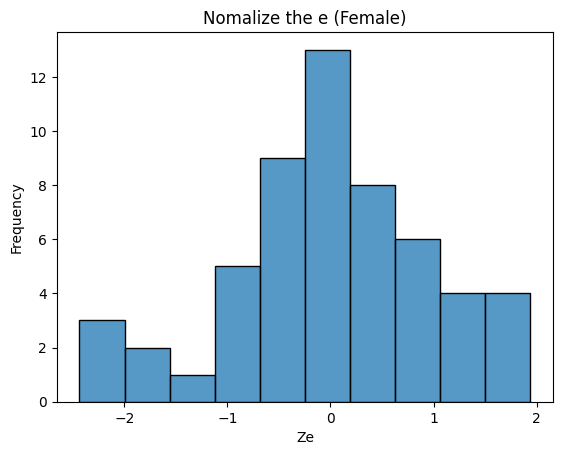

In [26]:
# Fitting the linear regression model
reg_female = LinearRegression()
reg_female.fit(df_female[['Height (Inches)']], df_female['Weight (Pounds)'])
predict_weight_female = reg_female.predict(df_female[['Height (Inches)']])

# Calculate the residuals
error_female = df_female['Weight (Pounds)'] - predict_weight_female

# Normalizing the residuals
mean_female = np.mean(error_female)
std_female = np.std(error_female)
normalize_female = (error_female - mean_female) / std_female

# Visualizing the distribution of normalized residuals
sns.histplot(normalize_female, bins=10)
plt.xlabel("Ze")
plt.ylabel("Frequency")
plt.title("Nomalize the e (Female)")
plt.show()

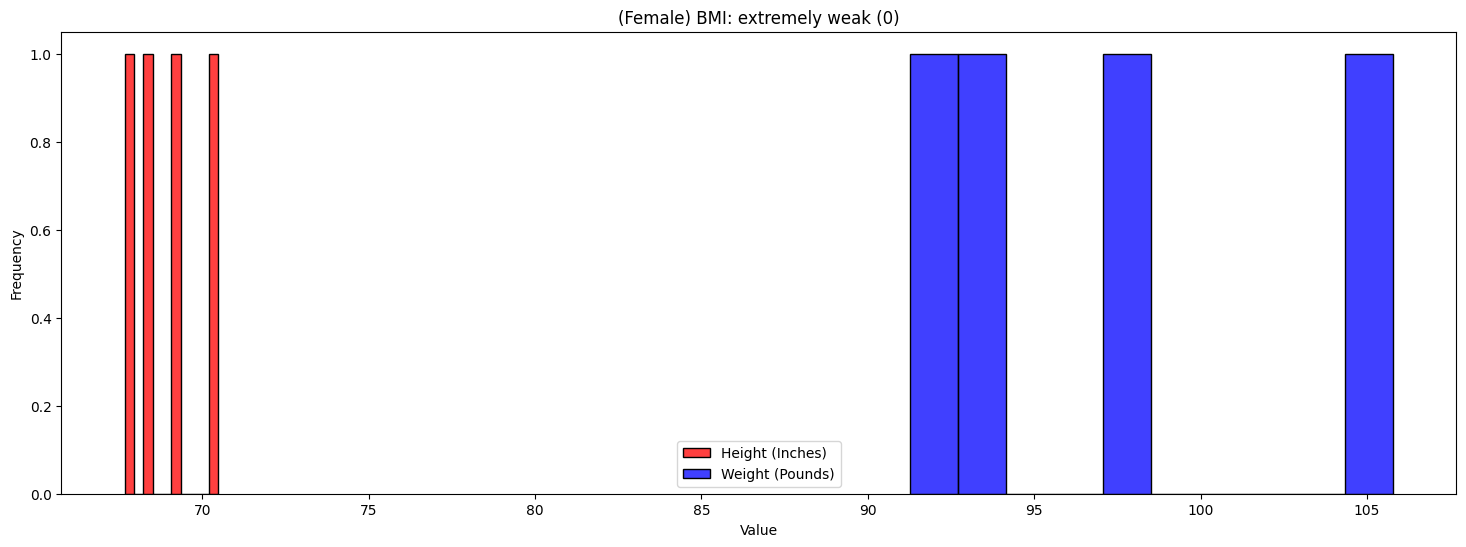

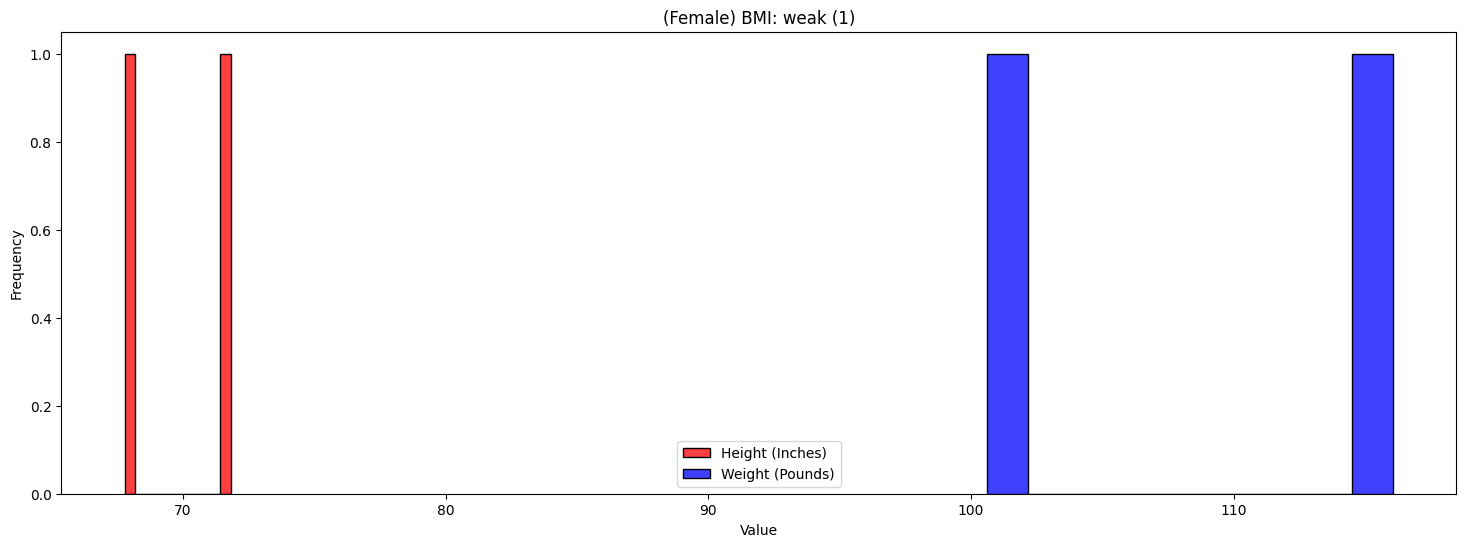

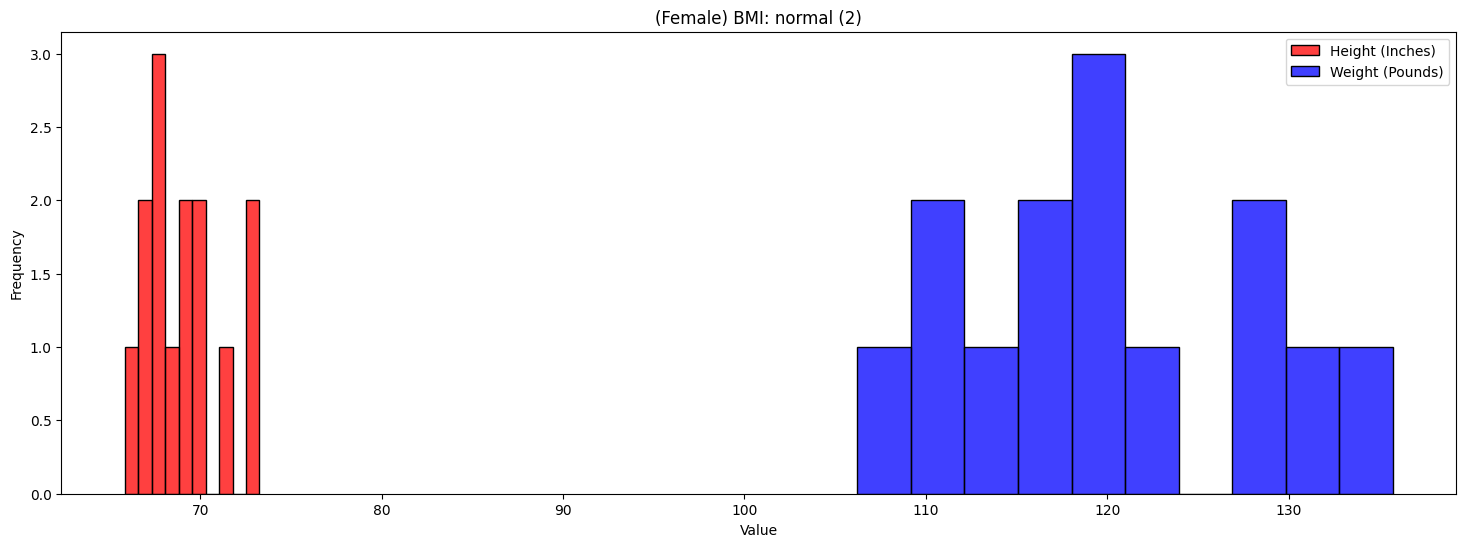

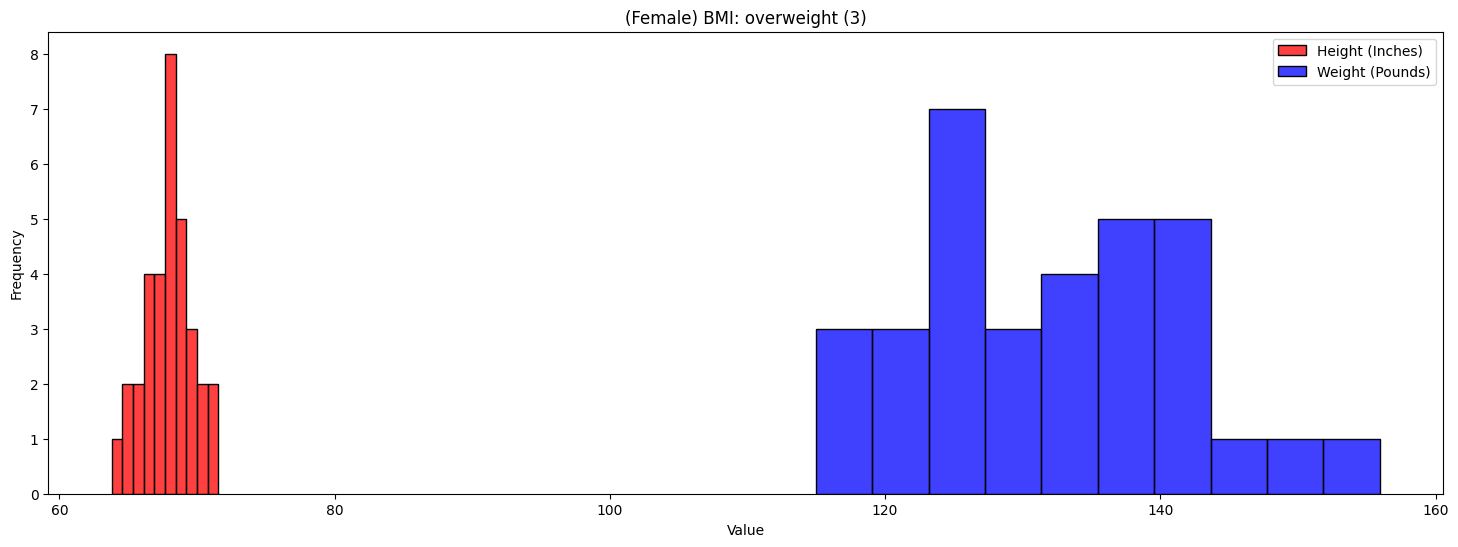

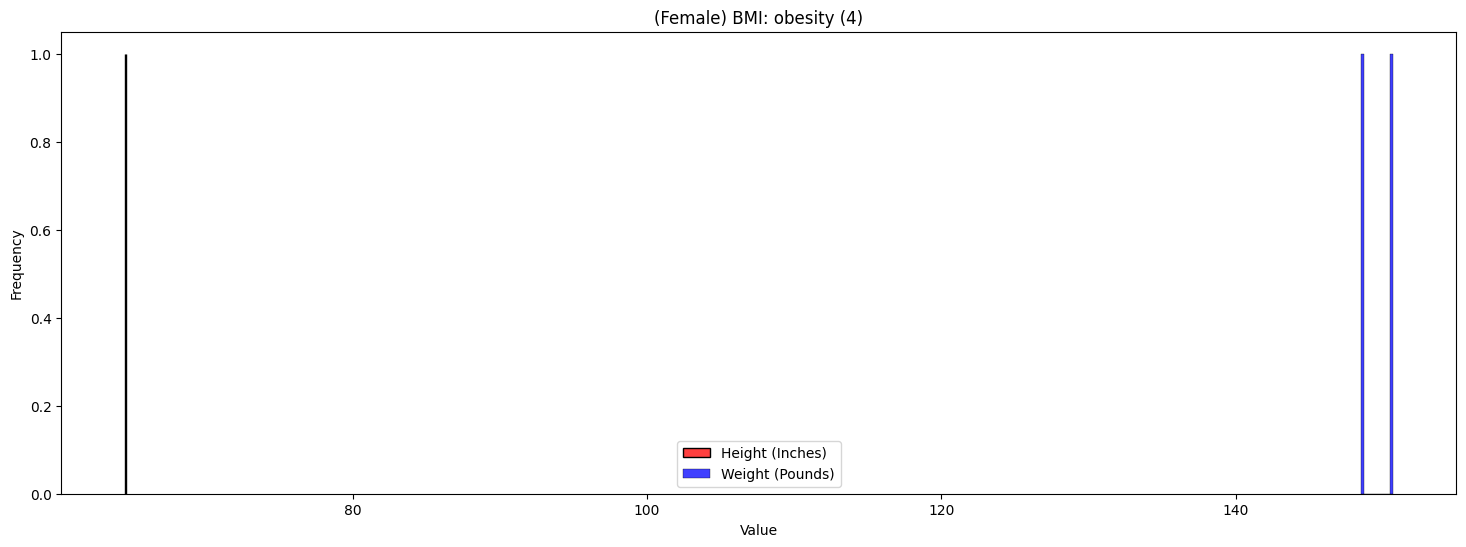

In [27]:
# Plot height & weight histograms (bins=10) for each BMI value
bmi_labels_female = ['extremely weak (0)', 'weak (1)', 'normal (2)', 'overweight (3)', 'obesity (4)']
for bmi_histogram_female in range(5):
    plt.figure(figsize=(18, 6))
    sns.histplot(data=df_female[df_female['BMI'] == bmi_histogram_female], x='Height (Inches)', bins=10, color='red', label='Height (Inches)')
    sns.histplot(data=df_female[df_female['BMI'] == bmi_histogram_female], x='Weight (Pounds)', bins=10, color='blue', label='Weight (Pounds)')
    plt.title(f'(Female) BMI: {bmi_labels_female[bmi_histogram_female]}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

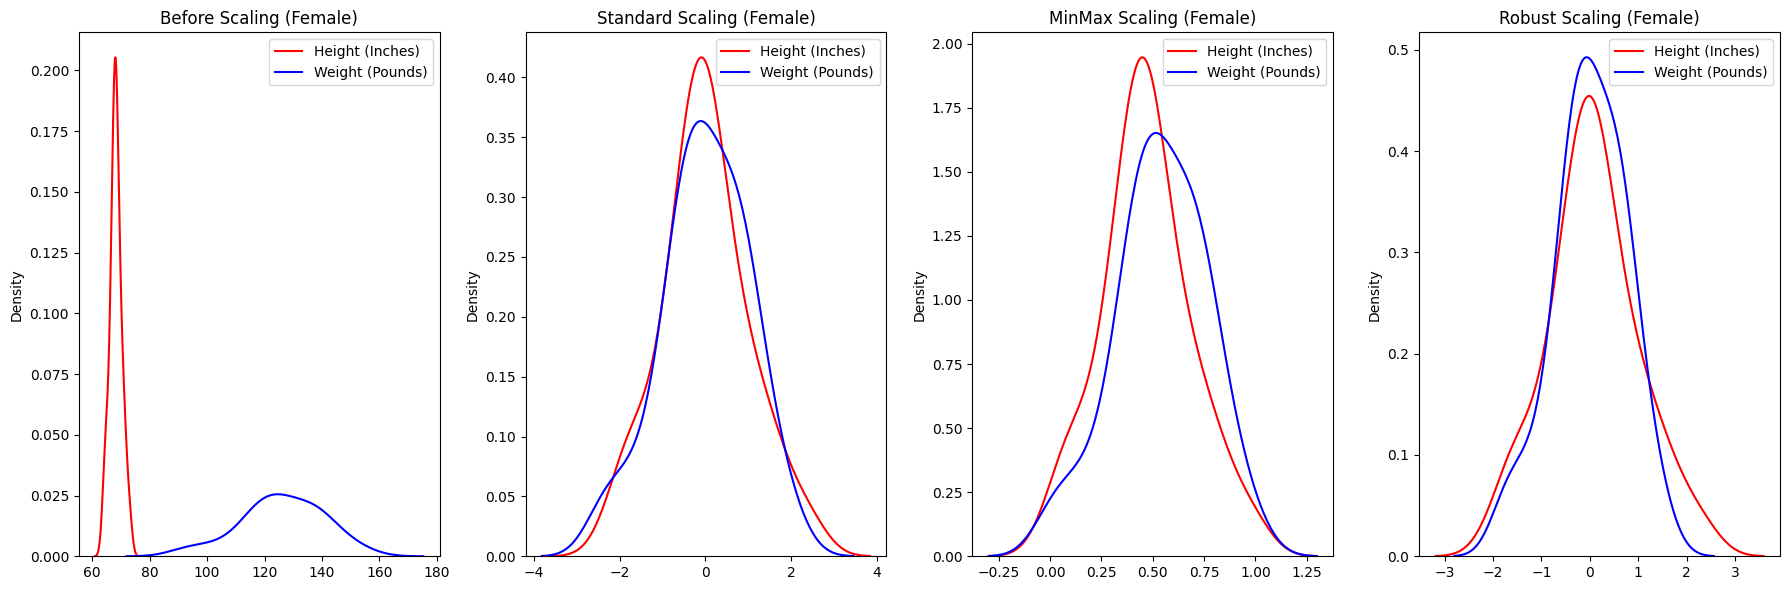

In [28]:
# Plot scaling results for height and weight
height_female = df_female['Height (Inches)'].to_numpy()
weight_female = df_female['Weight (Pounds)'].to_numpy()

# StandardScaler
height_standard_female = StandardScaler().fit_transform(height_female[:, np.newaxis]).reshape(-1)
weight_standard_female = StandardScaler().fit_transform(weight_female[:, np.newaxis]).reshape(-1)

# MinMaxScaler
height_minmax_female = MinMaxScaler().fit_transform(height_female[:, np.newaxis]).reshape(-1)
weight_minmax_female = MinMaxScaler().fit_transform(weight_female[:, np.newaxis]).reshape(-1)

# RobustScaler
height_robust_female = RobustScaler().fit_transform(height_female[:, np.newaxis]).reshape(-1)
weight_robust_female = RobustScaler().fit_transform(weight_female[:, np.newaxis]).reshape(-1)

# Plot the scaling
fig, axes = plt.subplots(ncols=4, figsize=(18, 6))

scalers_female = [('Before Scaling (Female)', height_female, weight_female),
                  ('Standard Scaling (Female)', height_standard_female, weight_standard_female),
                  ('MinMax Scaling (Female)', height_minmax_female, weight_minmax_female),
                  ('Robust Scaling (Female)', height_robust_female, weight_robust_female)]

for i, (title, height_scaled_female, weight_scaled_female) in enumerate(scalers_female):
    ax = axes[i]
    ax.set_title(title)
    sns.kdeplot(height_scaled_female, ax=ax, color='red', label='Height (Inches)')
    sns.kdeplot(weight_scaled_female, ax=ax, color='blue', label='Weight (Pounds)')
    ax.legend()

plt.tight_layout()
plt.show()

In [29]:
# Setting the threshold value and estimating BMI
alpha_female = 1.5
df_female = df_female.copy()
df_female['Estimated BMI'] = np.where(normalize_female < -alpha_female, 0, np.where(normalize_female > alpha_female, 4, np.nan))

# Actual BMI is 0 or 4 for female
actual_zero_female = df_female.index[(df_female['BMI'] == 0) & (df_female['Sex'] == 'Female')].tolist()
actual_four_female = df_female.index[(df_female['BMI'] == 4) & (df_female['Sex'] == 'Female')].tolist()

# Estimated BMI is 0 or 4 for female
estimate_zero_female = df_female.index[(df_female['Estimated BMI'] == 0) & (df_female['Sex'] == 'Female')].tolist()
estimate_four_female = df_female.index[(df_female['Estimated BMI'] == 4) & (df_female['Sex'] == 'Female')].tolist()

print("Actual BMI index 0 (Female)")
print(actual_zero_female)
print()

print("Estimated BMI index 0 (Female)")
print(estimate_zero_female)
print()

print("Actual BMI index 4 (Female)")
print(actual_four_female)
print()

print("Estimated BMI index 4 (Female)")
print(estimate_four_female)
print()

Actual BMI index 0 (Female)
[5, 11, 80, 90]

Estimated BMI index 0 (Female)
[5, 11, 55, 80, 90]

Actual BMI index 4 (Female)
[67, 99]

Estimated BMI index 4 (Female)
[12, 25, 67, 99]



In [30]:
# Male dataset
df_male = df[df['Sex'] == 'Male']

# Print dataset statistical data, feature names & data types
print("=== BMI Dataset (Male)===")
print(df_male.head())
print()

print("=== BMI Dataset Shape (Male)===")
print(df_male.shape)
print()

print("=== BMI Dataset Statistical (Male)===")
print(df_male.describe())
print()

print("=== BMI Dataset Feature Names & Data Types (Male)===")
print(df_male.dtypes)
print()

=== BMI Dataset (Male)===
     Sex  Age  Height (Inches)  Weight (Pounds)  BMI  Estimated BMI
3   Male   24          66.6432          86.9820    0            0.0
7   Male   25          69.1617         120.9844    2            NaN
10  Male   19          70.7084         122.3364    2            NaN
13  Male   28          68.0356         132.2480    3            NaN
14  Male   32          69.4815         128.6789    3            NaN

=== BMI Dataset Shape (Male)===
(45, 6)

=== BMI Dataset Statistical (Male)===
             Age  Height (Inches)  Weight (Pounds)        BMI  Estimated BMI
count  45.000000        45.000000        45.000000  45.000000      11.000000
mean   27.044444        67.160200       121.587964   2.333333       1.454545
std     5.696712         1.939932        19.123010   1.167748       2.018100
min    18.000000        63.125500        83.085300   0.000000       0.000000
25%    22.000000        65.772900       115.526100   2.000000       0.000000
50%    28.000000        

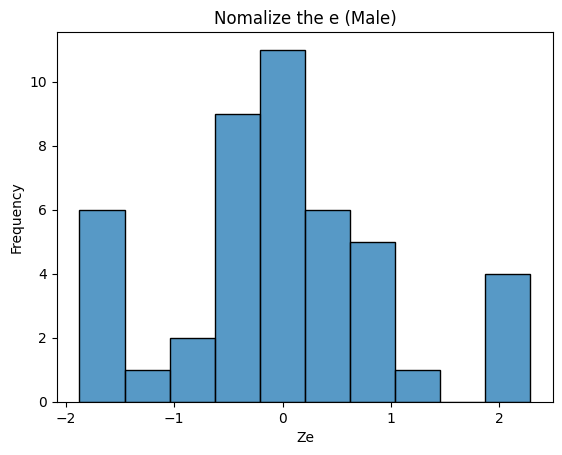

In [31]:
# Fitting the linear regression model
reg_male = LinearRegression()
reg_male.fit(df_male[['Height (Inches)']], df_male['Weight (Pounds)'])
predict_weight_male = reg_male.predict(df_male[['Height (Inches)']])

# Calculate the residuals
error_male = df_male['Weight (Pounds)'] - predict_weight_male

# Normalizing the residuals
mean_male = np.mean(error_male)
std_male = np.std(error_male)
normalize_male = (error_male - mean_male) / std_male

# Visualizing the distribution of normalized residuals
sns.histplot(normalize_male, bins=10)
plt.xlabel("Ze")
plt.ylabel("Frequency")
plt.title("Nomalize the e (Male)")
plt.show()

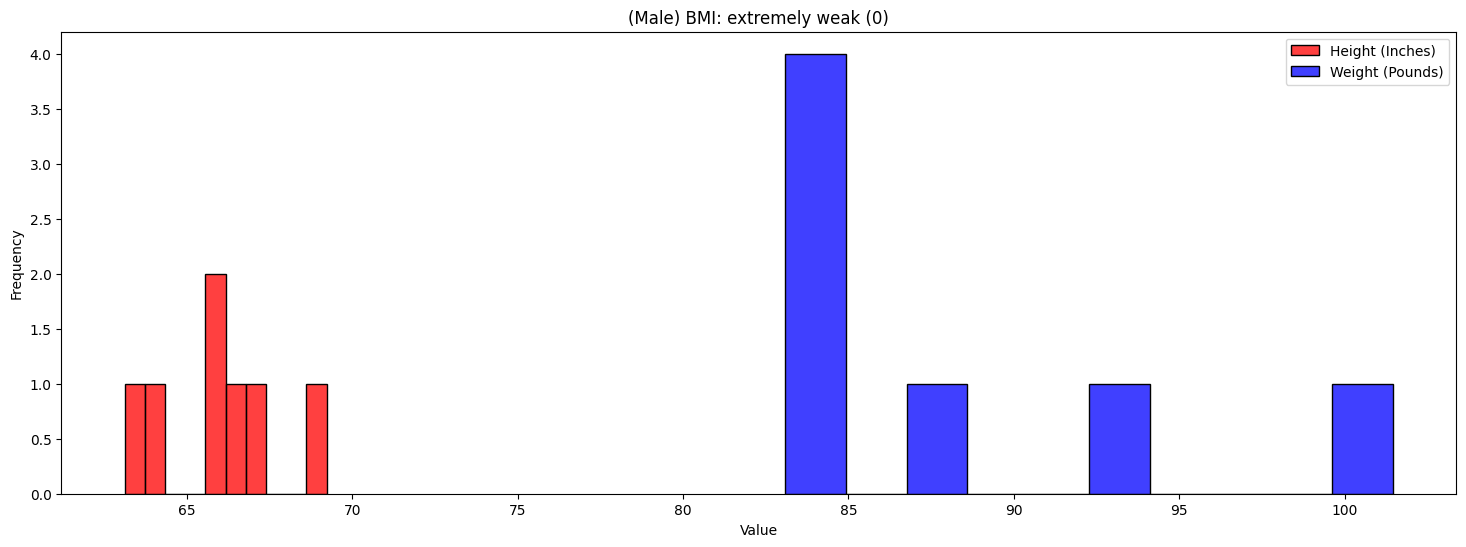

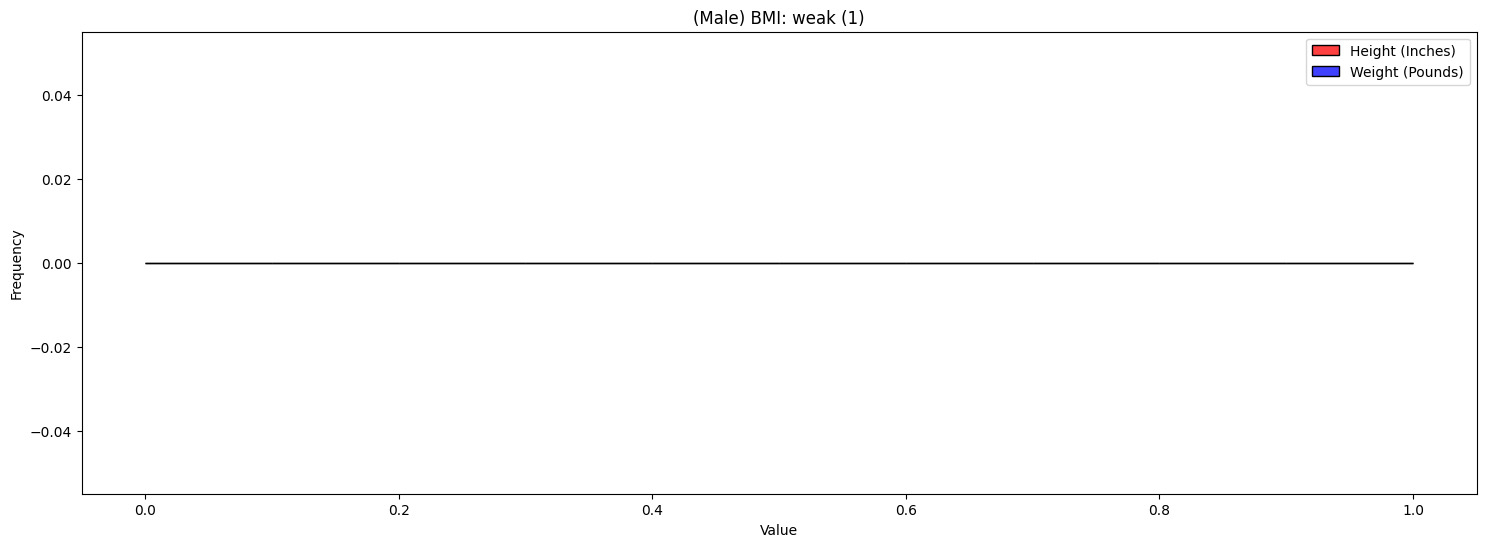

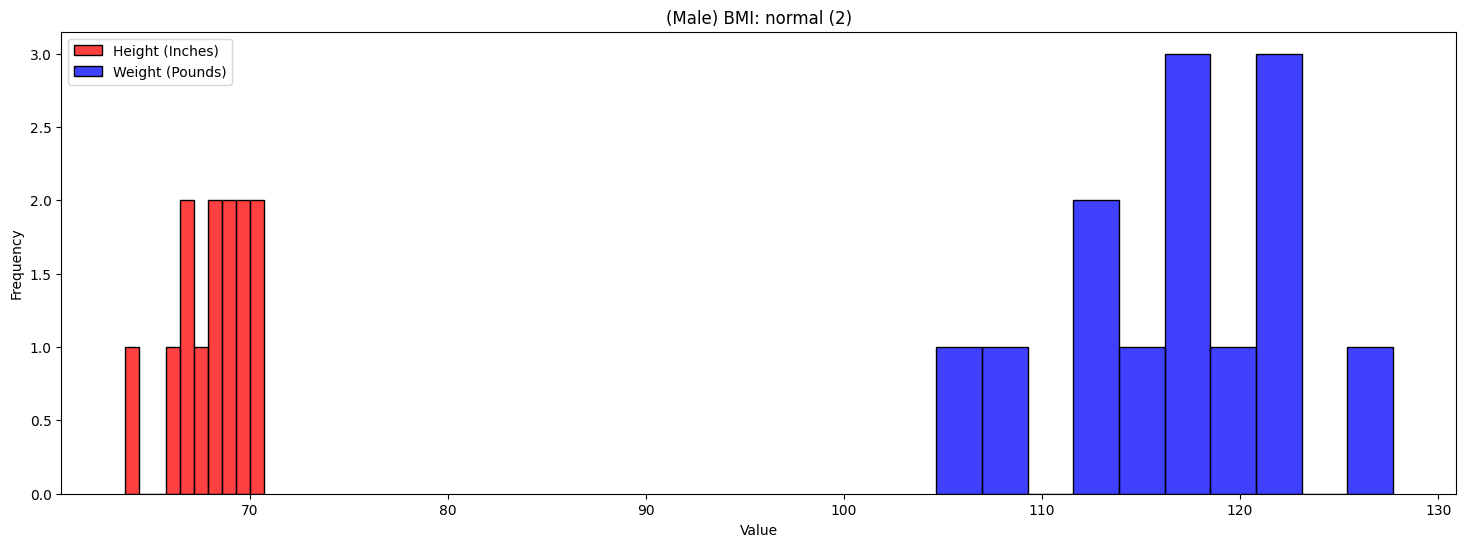

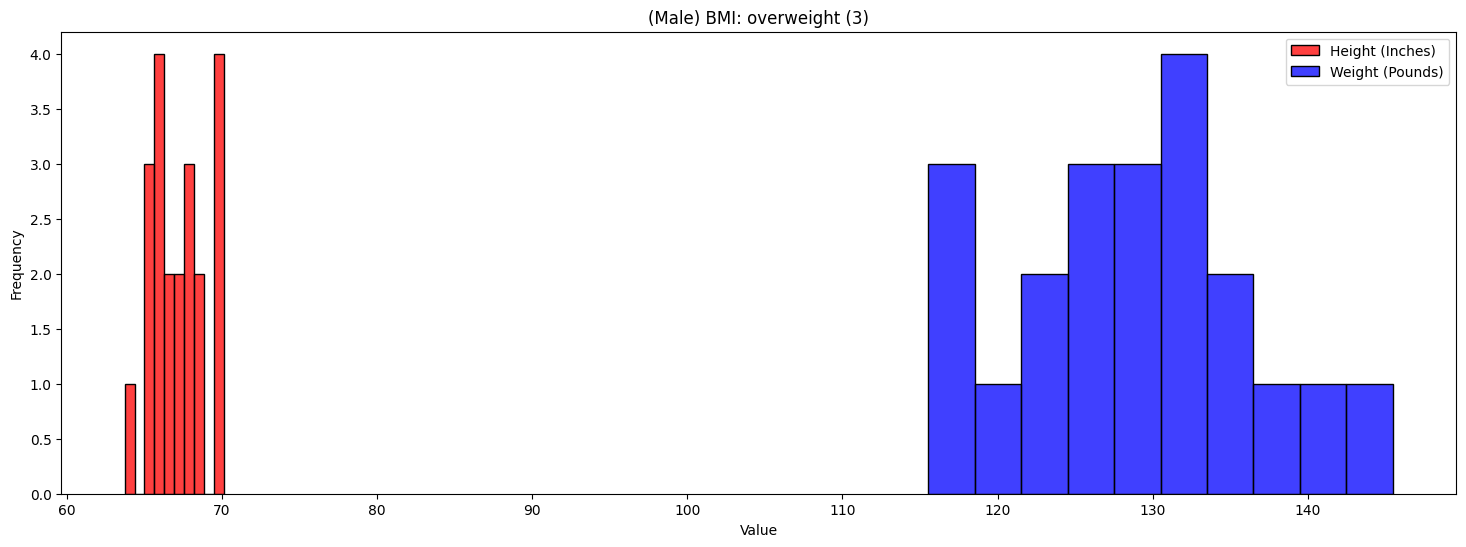

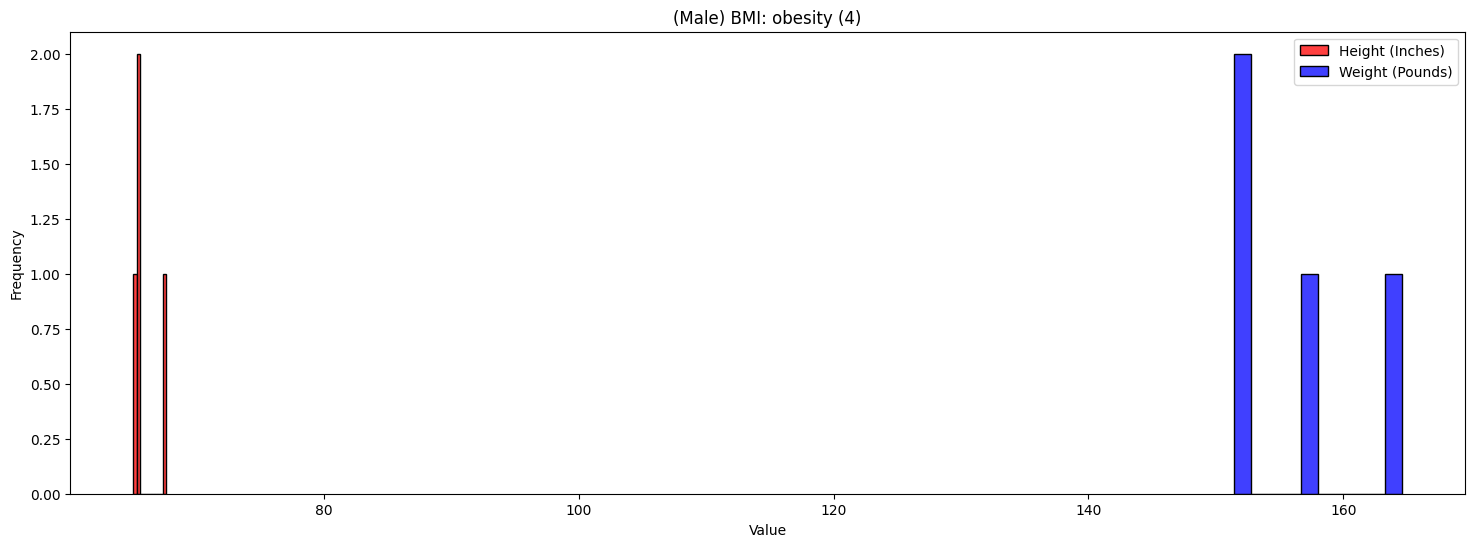

In [32]:
# Plot height & weight histograms (bins=10) for each BMI value
bmi_labels_male = ['extremely weak (0)', 'weak (1)', 'normal (2)', 'overweight (3)', 'obesity (4)']
for bmi_histogram_male in range(5):
    plt.figure(figsize=(18, 6))
    sns.histplot(data=df_male[df_male['BMI'] == bmi_histogram_male], x='Height (Inches)', bins=10, color='red', label='Height (Inches)')
    sns.histplot(data=df_male[df_male['BMI'] == bmi_histogram_male], x='Weight (Pounds)', bins=10, color='blue', label='Weight (Pounds)')
    plt.title(f'(Male) BMI: {bmi_labels_male[bmi_histogram_male]}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

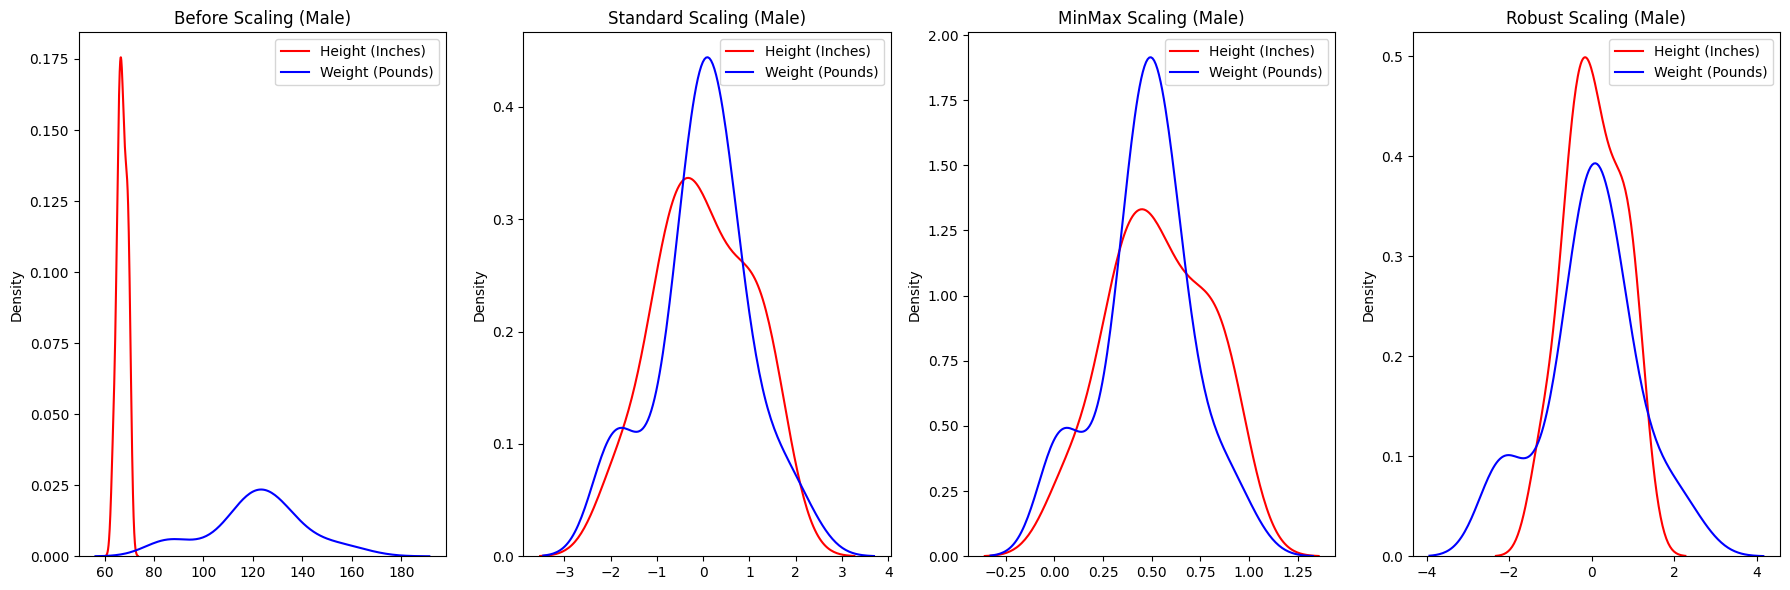

In [33]:
# Plot scaling results for height and weight
height_male = df_male['Height (Inches)'].to_numpy()
weight_male = df_male['Weight (Pounds)'].to_numpy()

# StandardScaler
height_standard_male = StandardScaler().fit_transform(height_male[:, np.newaxis]).reshape(-1)
weight_standard_male = StandardScaler().fit_transform(weight_male[:, np.newaxis]).reshape(-1)

# MinMaxScaler
height_minmax_male = MinMaxScaler().fit_transform(height_male[:, np.newaxis]).reshape(-1)
weight_minmax_male = MinMaxScaler().fit_transform(weight_male[:, np.newaxis]).reshape(-1)

# RobustScaler
height_robust_male = RobustScaler().fit_transform(height_male[:, np.newaxis]).reshape(-1)
weight_robust_male = RobustScaler().fit_transform(weight_male[:, np.newaxis]).reshape(-1)

# Plot the scaling
fig, axes = plt.subplots(ncols=4, figsize=(18, 6))

scalers_male = [('Before Scaling (Male)', height_male, weight_male),
                ('Standard Scaling (Male)', height_standard_male, weight_standard_male),
                ('MinMax Scaling (Male)', height_minmax_male, weight_minmax_male),
                ('Robust Scaling (Male)', height_robust_male, weight_robust_male)]

for i, (title, height_scaled_male, weight_scaled_male) in enumerate(scalers_male):
    ax = axes[i]
    ax.set_title(title)
    sns.kdeplot(height_scaled_male, ax=ax, color='red', label='Height (Inches)')
    sns.kdeplot(weight_scaled_male, ax=ax, color='blue', label='Weight (Pounds)')
    ax.legend()

plt.tight_layout()
plt.show()

In [34]:
# Setting the threshold value and estimating BMI
alpha_male = 1.5
df_male = df_male.copy()
df_male['Estimated BMI'] = np.where(normalize_male < -alpha_male, 0, np.where(normalize_male > alpha_male, 4, np.nan))

# Actual BMI is 0 or 4 for female
actual_zero_male = df_male.index[(df_male['BMI'] == 0) & (df_male['Sex'] == 'Male')].tolist()
actual_four_male = df_male.index[(df_male['BMI'] == 4) & (df_male['Sex'] == 'Male')].tolist()

# Estimated BMI is 0 or 4 for female
estimate_zero_male = df_male.index[(df_male['Estimated BMI'] == 0) & (df_male['Sex'] == 'Male')].tolist()
estimate_four_male = df_male.index[(df_male['Estimated BMI'] == 4) & (df_male['Sex'] == 'Male')].tolist()

print("Actual BMI index 0 (Male)")
print(actual_zero_male)
print()

print("Estimated BMI index 0 (Male)")
print(estimate_zero_male)
print()

print("Actual BMI index 4 (Male)")
print(actual_four_male)
print()

print("Estimated BMI index 4 (Male)")
print(estimate_four_male)
print()

Actual BMI index 0 (Male)
[3, 21, 26, 36, 52, 69, 97]

Estimated BMI index 0 (Male)
[3, 26, 52, 69, 97]

Actual BMI index 4 (Male)
[35, 58, 76, 94]

Estimated BMI index 4 (Male)
[35, 58, 76, 94]

